# Iris Flower Data Set 02 - Linear SVM

There are various methods to classify data, such as decision tree, random forest, naive Bayes etc. Each has their own advantages and disadvantages. A simple way to choose the right method is following the flowchart on the scikit-learn website (link below). The method that the flowchart recommends is Linear SVM.

https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

## Train Linear SVMs with two variables

First, let's begin importing the data set as usual.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

iris = datasets.load_iris()
x1 = iris.data[:, :2]   # grab the first two traits
x2 = iris.data[:, 2:]   # grab the last two traits
y = iris.target         # the corresponding iris species

Then, we can train the models and visualize them on scatter plots.

In [2]:
# Training the Linear SVMs

model1 = svm.LinearSVC(C = 1.0, max_iter = 10000).fit(x1, y)
model2 = svm.LinearSVC(C = 1.0, max_iter = 10000).fit(x2, y)

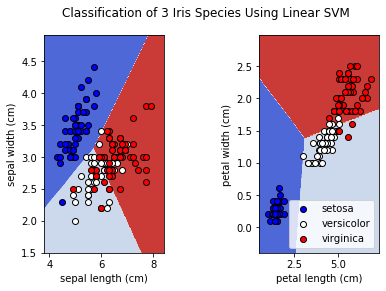

In [3]:
# Create the scatter plots

models = [model1, model2]

x_labels = [iris.feature_names[0], iris.feature_names[2]]
y_labels = [iris.feature_names[1], iris.feature_names[3]]

xs = [x1[:, 0], x2[:, 0]]
ys = [x1[:, 1], x2[:, 1]]

n_classes = len(iris.target_names)
plot_colours = "bwr"

def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 0.5, x.max() + 0.5
    y_min, y_max = y.min() - 0.5, y.max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

fig, sub = plt.subplots(1, 2)
plt.subplots_adjust(left = 0.125, wspace=0.8)

for clf, X, Y, nx, ny, ax in zip(models, xs, ys, x_labels, y_labels, sub.flatten()):
    xx, yy = make_meshgrid(X, Y)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm)

    for i, colour in zip(range(n_classes), plot_colours):
        idx = np.where(iris.target == i)
        ax.scatter(X[idx], Y[idx],label=iris.target_names[i], c=[colour], edgecolors = 'k')
        
    ax.set_xlabel(nx)
    ax.set_ylabel(ny)

fig.suptitle("Classification of 3 Iris Species Using Linear SVM")
plt.legend()
plt.show()

As seen in the graphs above, Linear SVM does a really good job in classifying the data points. To quantify how successful the models are, we can feed orignal data into the model again and see the percentage of correct guesses.

In [4]:
def success_rate(x, y, model):
    p = model.predict(x)
    return round(sum(p == y)/len(y), 2)

print("Model 1 success rate:", success_rate(x1, y, model1))
print("Model 2 success rate:", success_rate(x2, y, model2))

Model 1 success rate: 0.8
Model 2 success rate: 0.94


The success rates are 80% and 94% respectively, which are quite high.

## Train a Linear SVM with all four variables

Amazingly, we can actually train a Linear SVM with all four variables. The only downside is that there is no way for us to visualize 4-dimensional data. Therefore, we have to use the traditional training method to avoid overfitting. 

The Iris Flower Data Set will be randomly shuffled. Then, 90% of the data will be used in training, whereas the rest will be used to validate the trained model.

In [5]:
from sklearn.model_selection import train_test_split

# Conveniently there is a function that automatically split data sets
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, train_size=0.9, random_state=42)

# Train the ultimate model with all four variables
model_x = svm.LinearSVC(C = 1.0, max_iter = 10000).fit(X_train, y_train)

Now, compute the success rate for both training and testing data.

In [6]:
print("Model X success rate on training data:", success_rate(X_train, y_train, model_x))
print("Model X success rate on testing data:", success_rate(X_test, y_test, model_x))

Model X success rate on training data: 0.97
Model X success rate on testing data: 1.0


Both success rates were above 95%, meaning Model X that we just built performed splendidly. Linear SVM is indeed  great classifier for Iris Flower Data Set.